# Stroke Prediction

## Introduction

As stroke rates rise globally, there is an increasing demand for tools to predict stroke risk. Analyzing such datasets with machine learning algorithms is crucial. The Decision Tree (DT) model identified **age**, **BMI** (Body Mass Index), and **blood glucose levels** as the most critical factors increasing stroke risk. The Logistic Regression model achieved **70% accuracy**, while the Decision Tree model reached **60% accuracy**. Additionally, recall optimization was implemented to enhance the model's ability to accurately identify at-risk patients.

### Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

*This machine learning model was developed using the dataset titled "Stroke Prediction Dataset" available on the Kaggle platform.* 

*The model was created by* **Çağatay Elik**.

You can access the dataset here:

__[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)__

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

## Understanding Data

In [3]:
df.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df= df.drop("id", axis=1) #This is an unnecessary column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


There is missing data in the BMI section. We can fill those data using DT algorithm. 

In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Distribution of the Stroke Column**

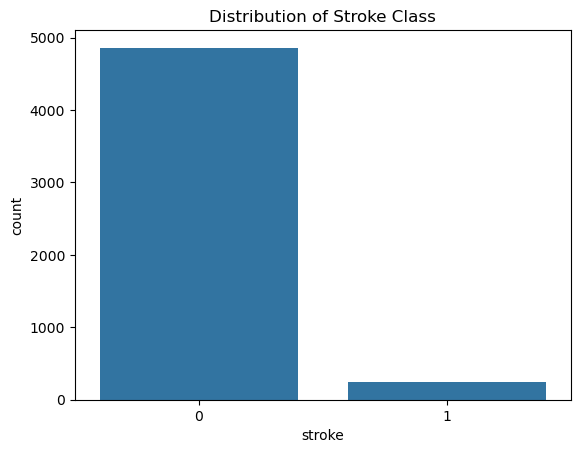

In [7]:
plt.figure()
sns.countplot(x= "stroke", data=df)
plt.title("Distribution of Stroke Class")
plt.show()

In [8]:
print(df['stroke'].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


In [9]:
print(df['stroke'].value_counts(normalize=True) * 100) 

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


**95% of our dependent variable's 'stroke' column consists of '0' data. If we say no stroke (0) to each patient in front of us, we will achieve 95% success. We should bring the data to a level where 0 and 1 are equal to avoid misleading results.**

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Filling BMI missing data with the DT model

In [11]:
DT_bmi_pipe= Pipeline(steps=[
    ("scale", StandardScaler()),
    ("dtr", DecisionTreeRegressor())
    ])

X= df[["gender", "age", "hypertension", "avg_glucose_level", "bmi" ]].copy()

In [12]:
X.head()

,gender,age,hypertension,avg_glucose_level,bmi
0,Male,67.0,0,228.69,36.6
1,Female,61.0,0,202.21,NaN
2,Male,80.0,0,105.92,32.5
3,Female,49.0,0,171.23,34.4
4,Female,79.0,1,174.12,24.0


male -> 0, female -> 1, other -> -1

In [13]:
X.gender= X.gender.replace({"Male": 0, "Female": 1, "Other": -1}).astype(np.uint8)

In [14]:
X

,gender,age,hypertension,avg_glucose_level,bmi
0,0,67.0,0,228.69,36.6
1,1,61.0,0,202.21,NaN
2,0,80.0,0,105.92,32.5
3,1,49.0,0,171.23,34.4
4,1,79.0,1,174.12,24.0
...,...,...,...,...,...
5105,1,80.0,1,83.75,NaN
5106,1,81.0,0,125.20,40.0
5107,1,35.0,0,82.99,30.6
5108,0,51.0,0,166.29,25.6


NaN Values

In [15]:
missing = X[X.bmi.isna()]

Non-NaN Values

In [16]:
X = X[-X.bmi.isna()]

In [17]:
X

,gender,age,hypertension,avg_glucose_level,bmi
0,0,67.0,0,228.69,36.6
2,0,80.0,0,105.92,32.5
3,1,49.0,0,171.23,34.4
4,1,79.0,1,174.12,24.0
5,0,81.0,0,186.21,29.0
...,...,...,...,...,...
5104,1,13.0,0,103.08,18.6
5106,1,81.0,0,125.20,40.0
5107,1,35.0,0,82.99,30.6
5108,0,51.0,0,166.29,25.6


In [18]:
y= X.pop("bmi")

In [19]:
y

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

**Training the model with non-missing data**

In [20]:
DT_bmi_pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('dtr', DecisionTreeRegressor())])

I will have the DT Model estimate the missing BMI using the columns ‘gender’, ‘age’, ‘hypertension’, ‘avg_glucose_level’.  

In [21]:
predicted_bmi = pd.Series(DT_bmi_pipe.predict(missing[["gender", "age", "hypertension", "avg_glucose_level"]]), index=missing.index)

In [22]:
df.loc[missing.index, "bmi"] = predicted_bmi

In [23]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Stroke Data Balancing

In [24]:
random_zeros = df[df['stroke'] == 0].sample(n=249, random_state=42)
ones = df[df['stroke'] == 1]

df = pd.concat([random_zeros, ones], ignore_index=True)

print(df['stroke'].value_counts())

stroke
0    249
1    249
Name: count, dtype: int64


## Model Encoding

In [25]:
cat_cols= [col for col in df.columns if df[col].dtype== "object"]
num_cols= [col for col in df.columns if df[col].dtype!= "object"] 

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'children' 'Govt_job' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['never smoked' 'formerly smoked' 'Unknown' 'smokes']


In [26]:
df["gender"] = df["gender"].replace({"Male": 0, "Female": 1, "Other": 2}).astype(np.int8) 

df["ever_married"] = df["ever_married"].replace({"Yes": 1, "No": 0}).astype(np.int8) 

df["smoking_status"] = df["smoking_status"].replace({"formerly smoked": 0, "never smoked": 1, "smokes": 2, "Unknown": 3}).astype(np.int8) 

df["Residence_type"] = df["Residence_type"].replace({"Rural": 0, "Urban": 1}).astype(np.int8)  

df["work_type"] = df["work_type"].replace({"Private": 0, "Self-employed": 1, "Govt_job": 2, "children": 3, "Never_worked": 4}).astype(np.int8) 

print(df["gender"].unique())
print(df["ever_married"].unique())
print(df["smoking_status"].unique())
print(df["Residence_type"].unique())
print(df["work_type"].unique())

[0 1]
[1 0]
[1 0 3 2]
[1 0]
[0 1 3 2 4]


In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,44.0,0,0,1,0,1,80.75,30.9,1,0
1,1,75.0,1,0,1,1,0,219.82,29.5,0,0
2,1,56.0,0,0,1,0,1,94.19,25.7,1,0
3,1,5.0,0,0,0,3,1,122.25,16.7,3,0
4,1,69.0,0,0,1,1,0,110.96,25.9,1,0


In [28]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Column Analyses

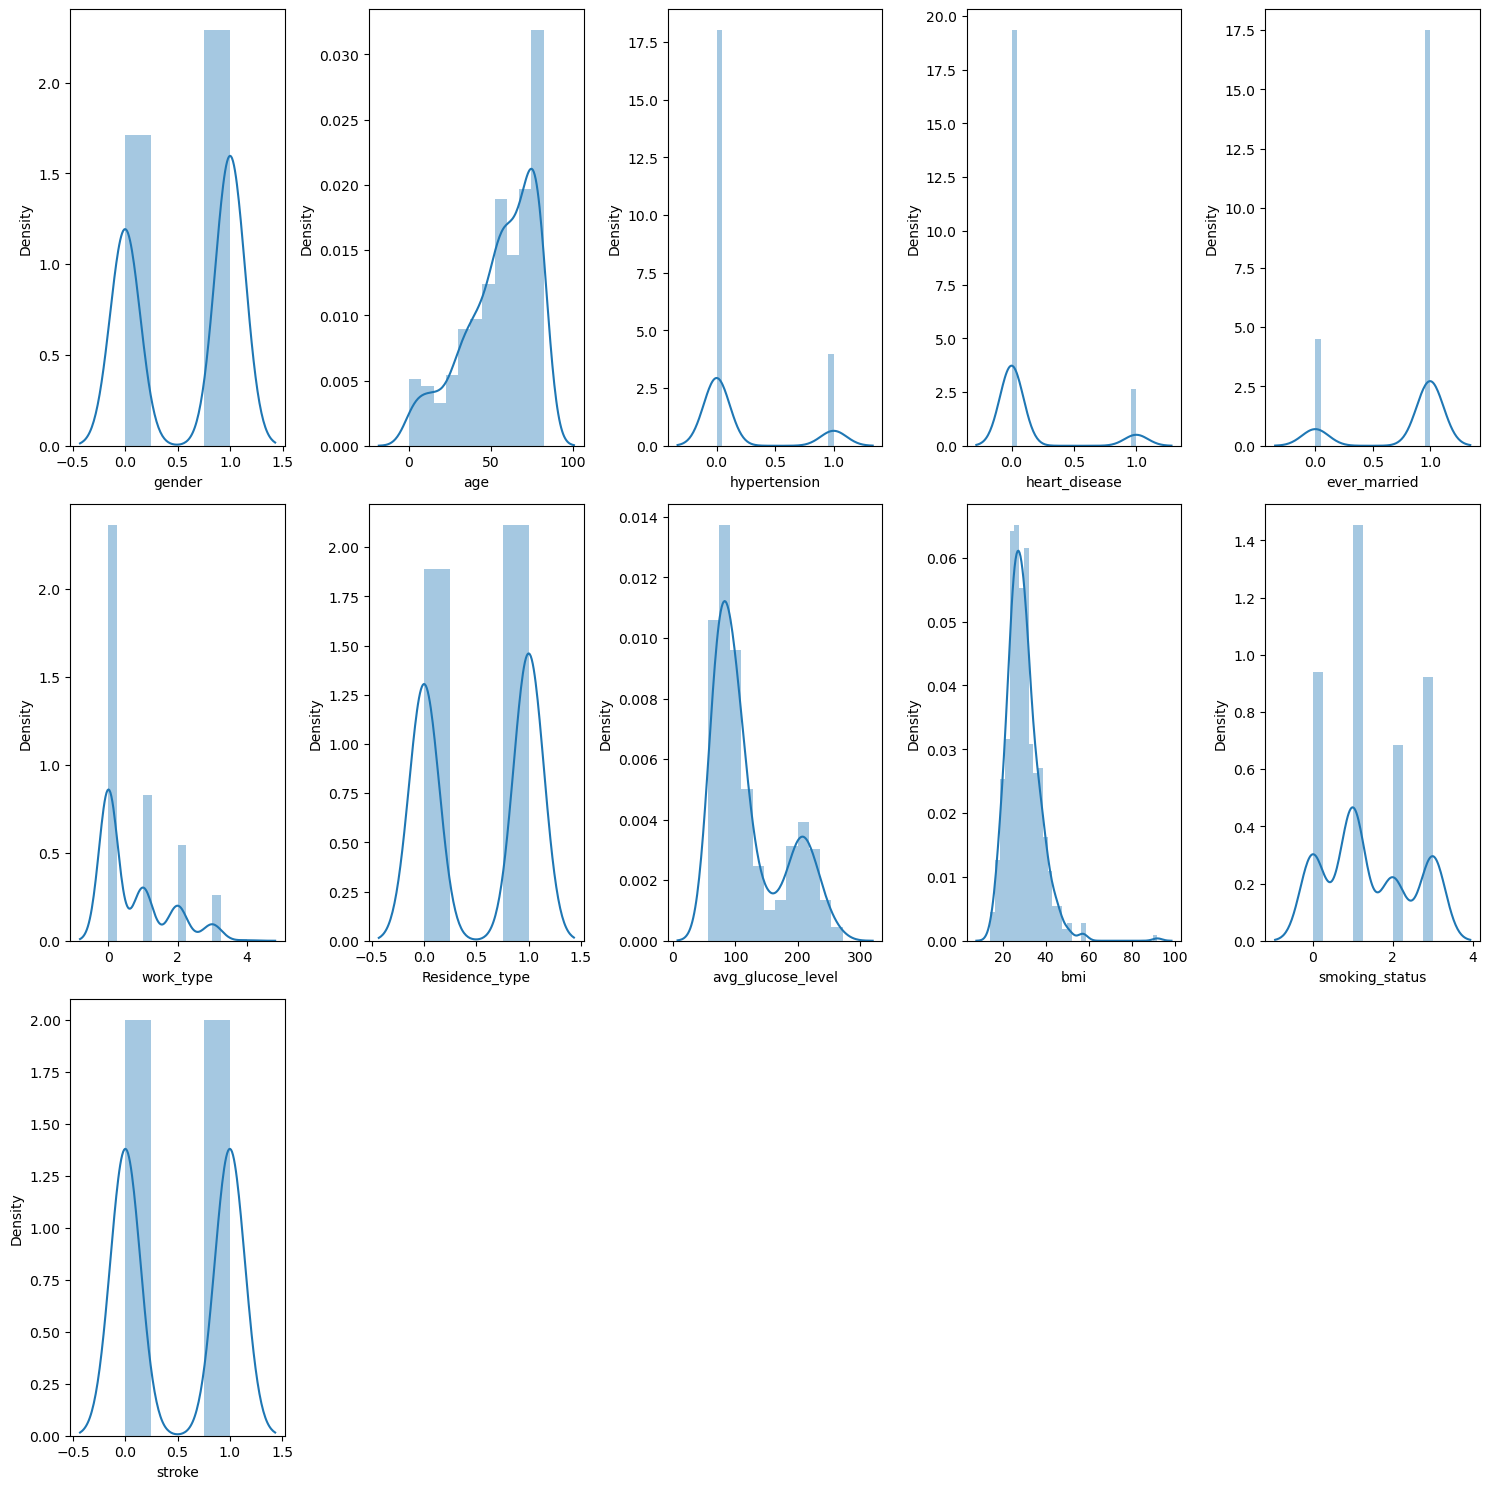

In [29]:
plt.figure(figsize= (15,15))
plotnumber = 1

for col in df:
    if plotnumber <= 14:
        ax = plt.subplot(3,5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## Analyzing the Relationships

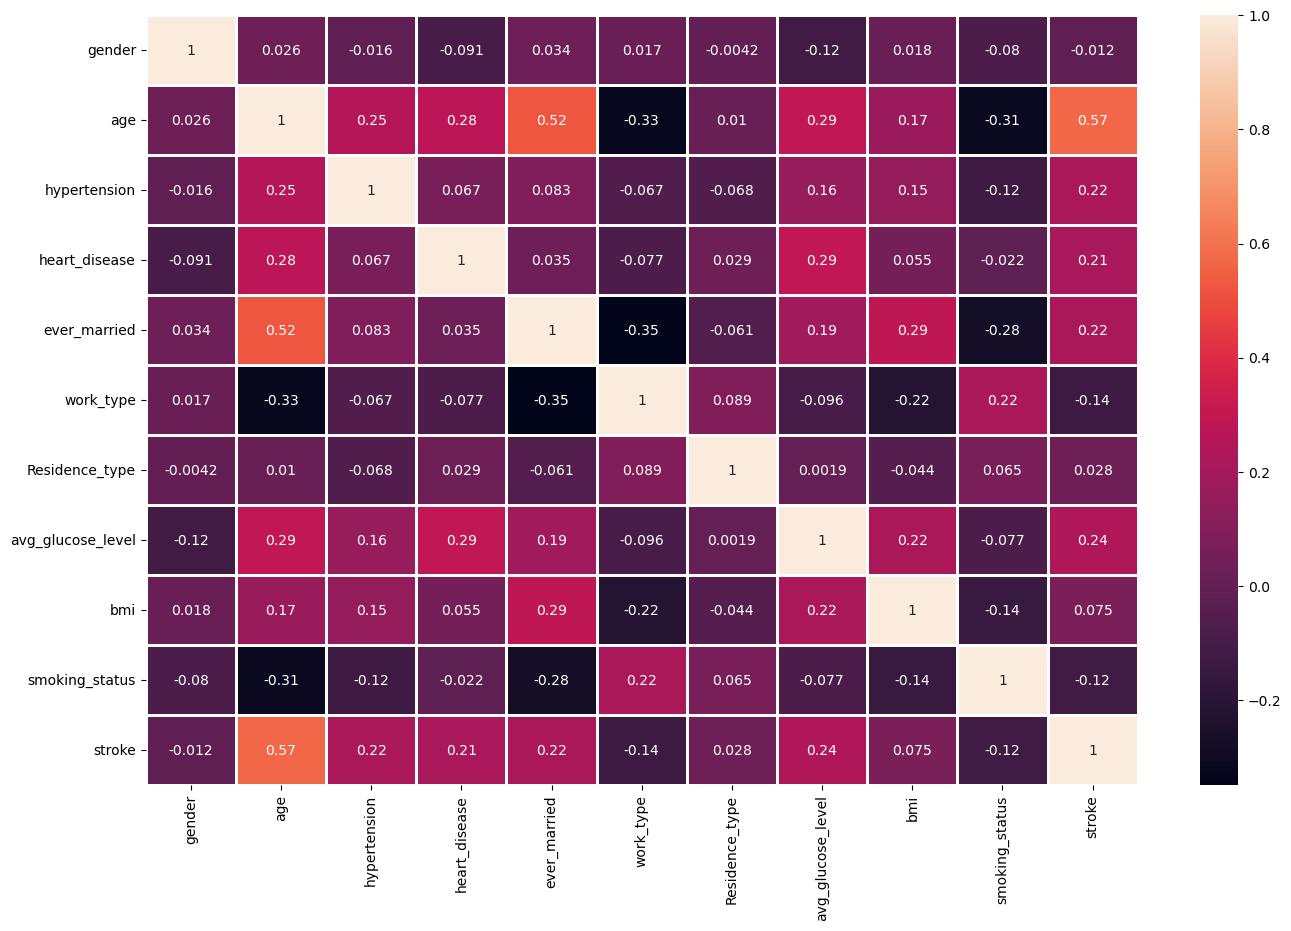

In [30]:
plt.figure(figsize=(16, 10)) 

df_numeric = df.select_dtypes(include=['float64', 'int64', 'int8'])

sns.heatmap(df_numeric.corr(), annot=True, linecolor="white", linewidths=2)

plt.show()

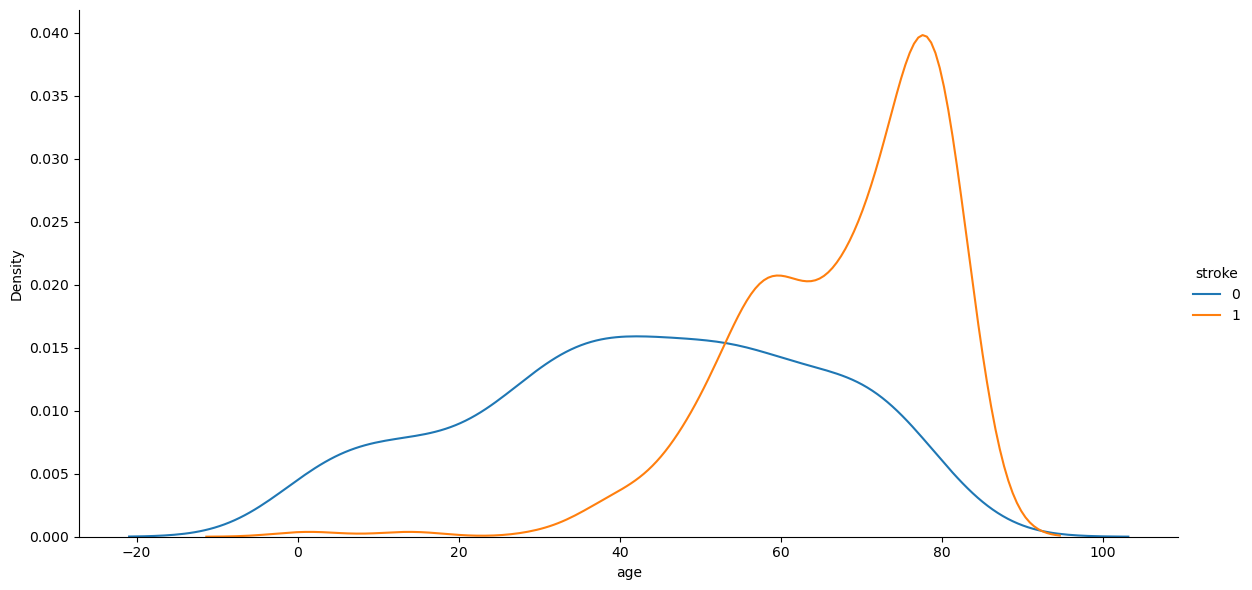

In [31]:
def kde(col):
    grid= sns.FacetGrid(df, hue= "stroke", height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

kde("age")

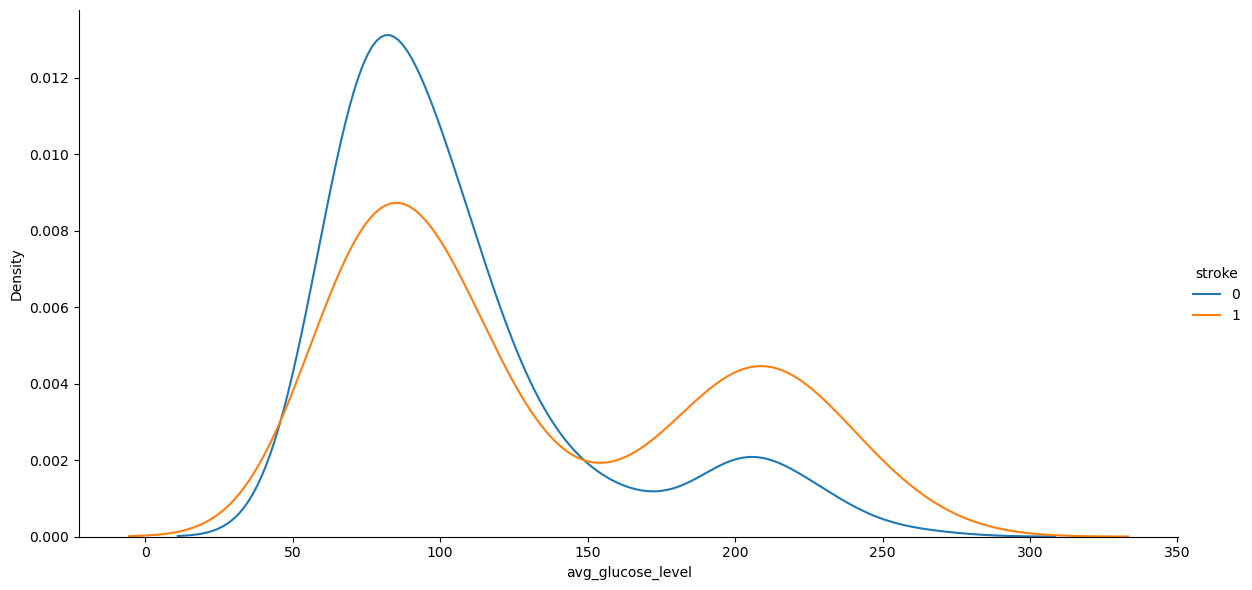

In [32]:
def kde(col):
    grid= sns.FacetGrid(df, hue= "stroke", height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

kde("avg_glucose_level")

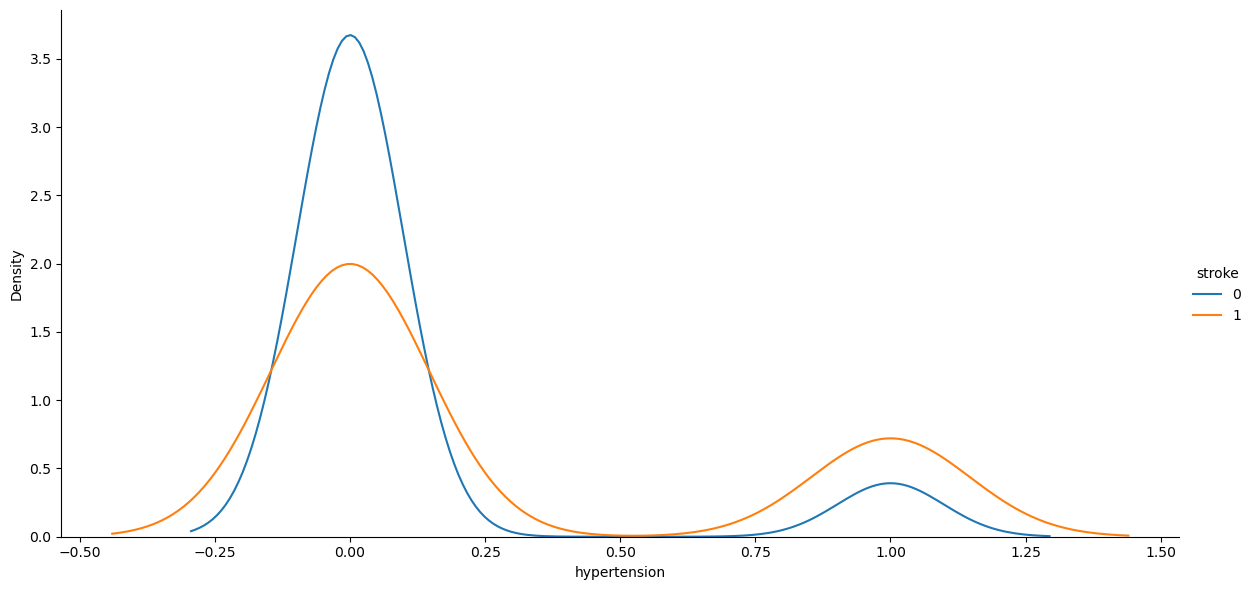

In [33]:
def kde(col):
    grid= sns.FacetGrid(df, hue= "stroke", height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

kde("hypertension")

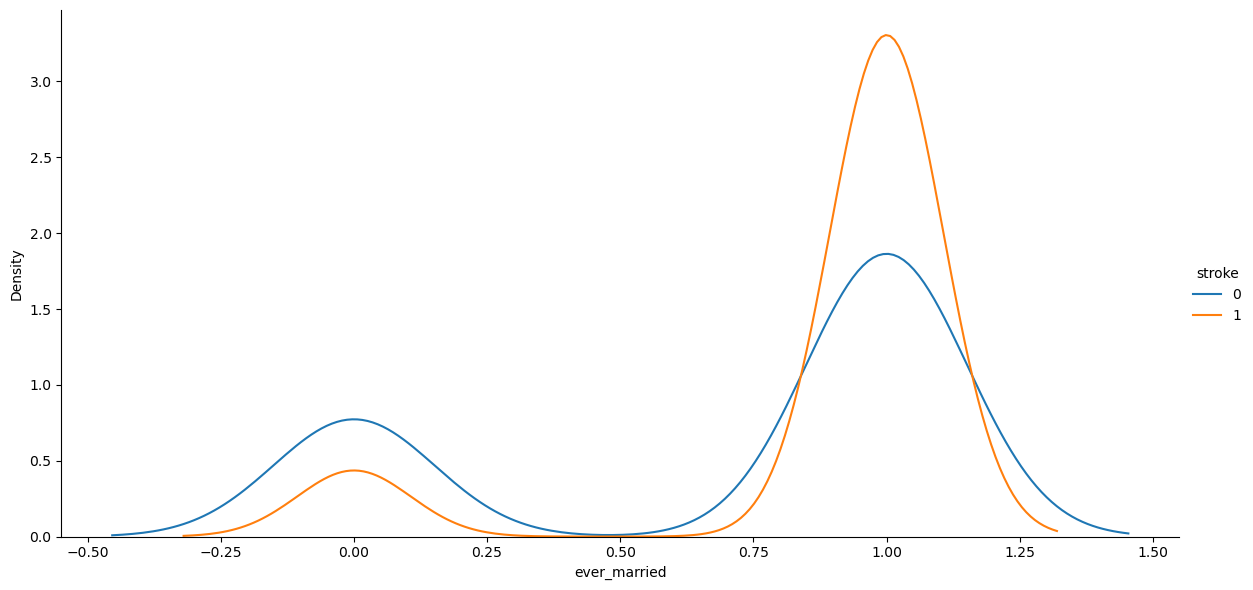

In [34]:
def kde(col):
    grid= sns.FacetGrid(df, hue= "stroke", height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

kde("ever_married")

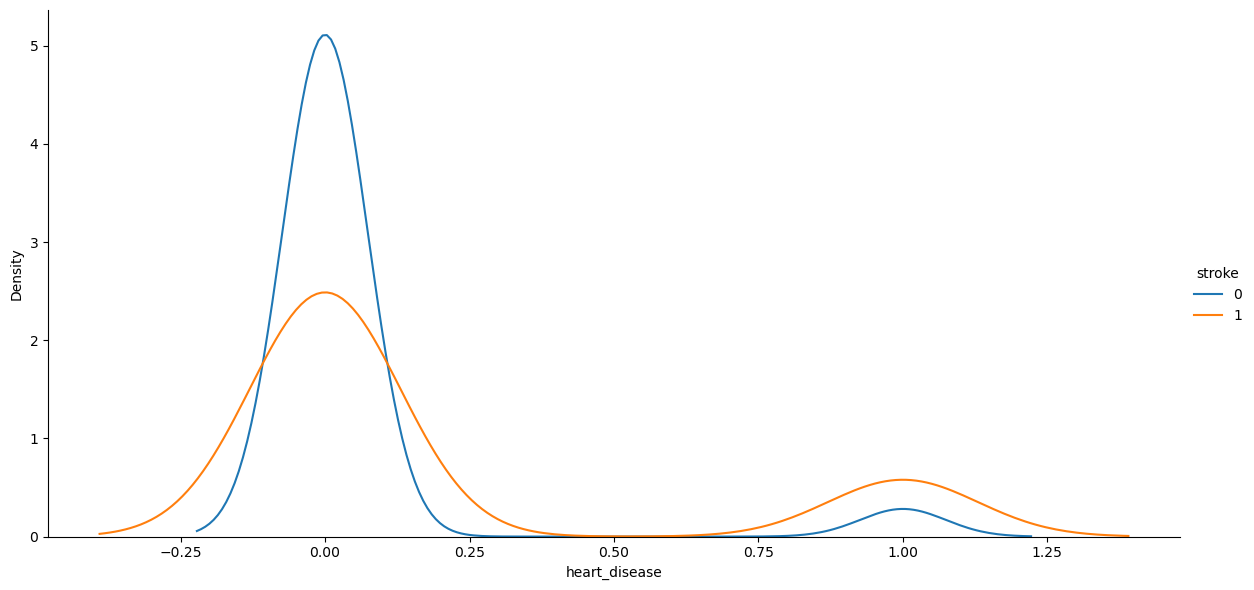

In [35]:
def kde(col):
    grid= sns.FacetGrid(df, hue= "stroke", height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

kde("heart_disease")

## Test/Train Split

In [36]:
independent_col = [col for col in df.columns if col != "stroke"]
dependent_col = "stroke"

In [37]:
X= df[independent_col]
y= df[dependent_col]

In [38]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=42)

## Defining Models for Evaluation

In [39]:
logreg_pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("LR", LogisticRegression())
])

dt_pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("DT", DecisionTreeClassifier(random_state=42))
])

logreg_pipe.fit(X_train, y_train)
dt_pipe.fit(X_train, y_train)

y_pred_logreg = logreg_pipe.predict(X_test)
y_pred_dt = dt_pipe.predict(X_test)

## Model Results

In [40]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Logistic Regression Results:
Accuracy: 0.7
Confusion Matrix:
 [[20  9]
 [ 6 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.62      0.71      0.67        21

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.71      0.70      0.70        50


Decision Tree Results:
Accuracy: 0.6
Confusion Matrix:
 [[20  9]
 [11 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67        29
           1       0.53      0.48      0.50        21

    accuracy                           0.60        50
   macro avg       0.59      0.58      0.58        50
weighted avg       0.60      0.60      0.60        50



**The Logistic Regression model correctly predicted '0' (no stroke) 20 times and incorrectly predicted '1' (stroke) 6 times for the '0' class. For the '1' class, it correctly predicted '1' 15 times and incorrectly predicted '0' 9 times, achieving an accuracy of 0.70. The Decision Tree model correctly predicted '0' 20 times and incorrectly predicted '1' 11 times for the '0' class, while for the '1' class, it correctly predicted '1' 10 times and incorrectly predicted '0' 9 times, resulting in an accuracy of 0.60.**

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

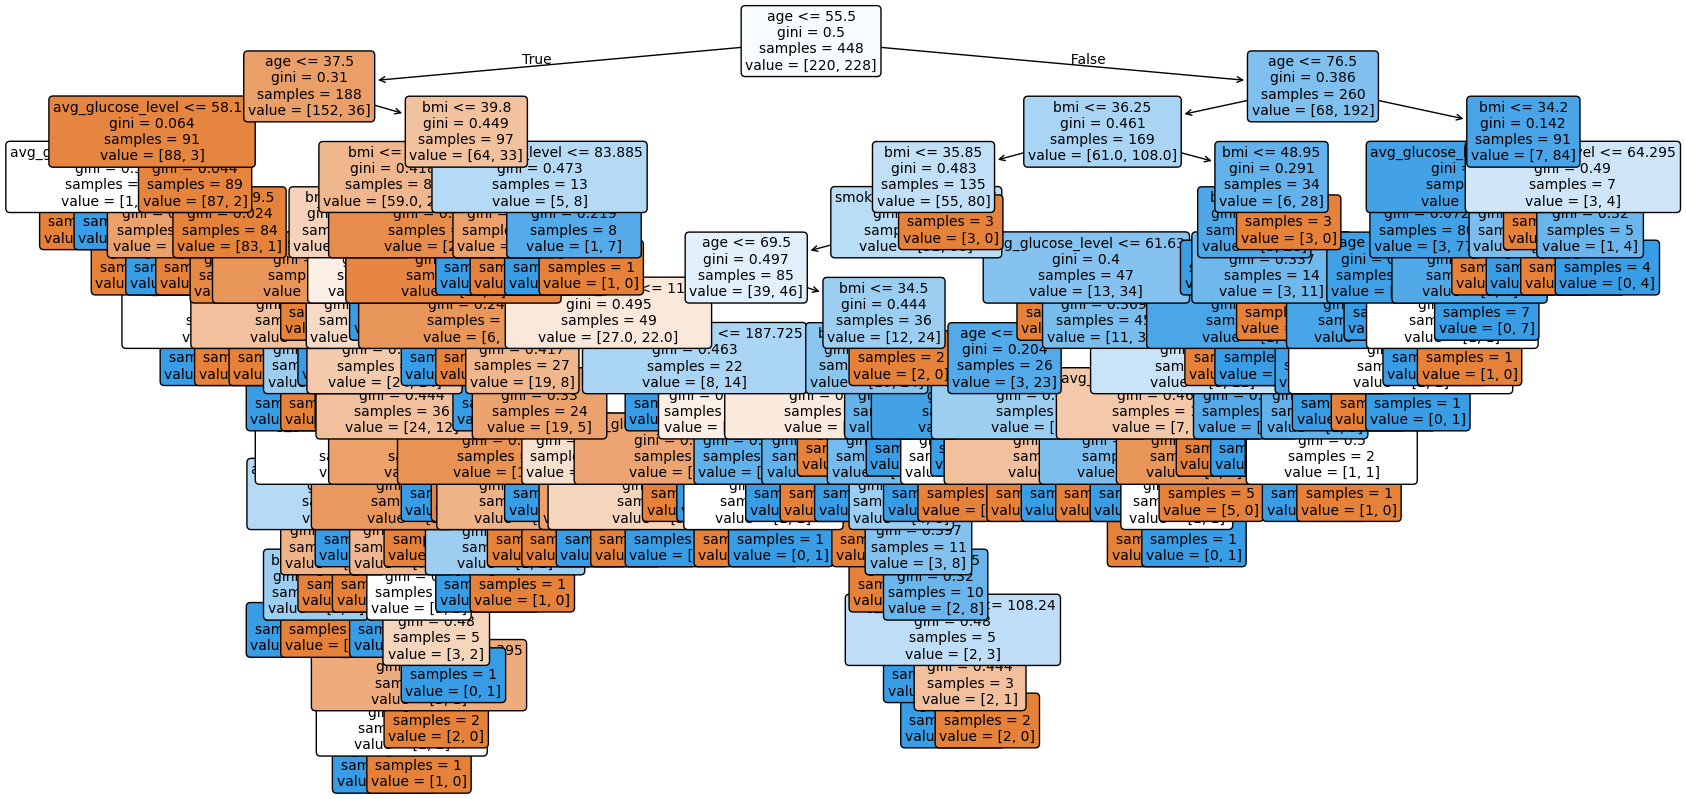

In [42]:
class_names= ["Not_Stroke", "Stroke"]

plt.figure(figsize= (20,10))
plot_tree(dtc, feature_names=independent_col, filled=True, rounded=True, fontsize=10)
plt.show()

It is not possible to analyze the current visualization of the Decision Tree. Let us evaluate the factors with the most critical weight. 

## Determination of Feature Importance

In [43]:
feature_importance = pd.DataFrame({"Feature": independent_col, "Importance": dtc.feature_importances_})
feature_importance

,Feature,Importance
0,gender,0.010420
1,age,0.434470
2,hypertension,0.011153
3,heart_disease,0.026819
4,ever_married,0.014184
5,work_type,0.012096
6,Residence_type,0.018309
7,avg_glucose_level,0.216715
8,bmi,0.231120
9,smoking_status,0.024713


In [44]:
print("Most Important Feature: ", feature_importance.sort_values(by='Importance', ascending=False).iloc[0])

Most Important Feature:  Feature           age
Importance    0.43447
Name: 1, dtype: object


Text(0.5, 1.0, 'Feature Importance')

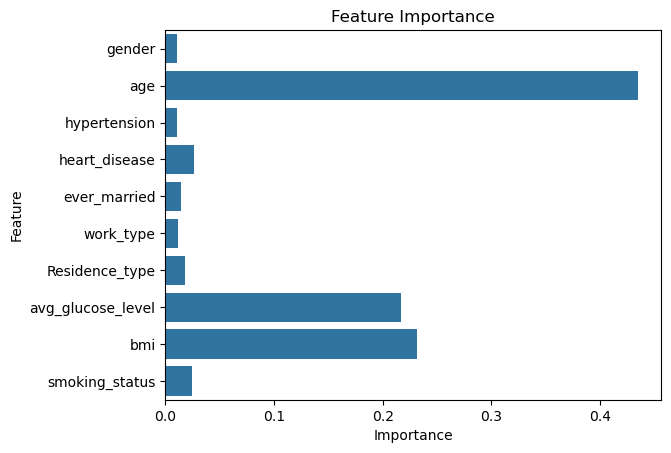

In [45]:
plt.figure()
sns.barplot(x= "Importance", y= "Feature", data= feature_importance)
plt.title("Feature Importance")

The most important factors used by the model in stroke detection were **age, bmi, avg_glucose_level, smoking_status and heart_disease.**

## Model Save and Restore, Real Patient Testing (Probability Demonstration)

In [46]:
import joblib
joblib.dump(logreg_pipe, "log_reg_model.pkl")

['log_reg_model.pkl']

In [47]:
loaded_log_reg_pipe = joblib.load("log_reg_model.pkl")

In [48]:
columns_order = X_train.columns

new_patient_data = pd.DataFrame({
    "gender": [0],
    "ever_married": [0],
    "age": [70],
    "hypertension": [0],
    "heart_disease": [0],    
    "work_type": [1],
    "Residence_type": [1],
    "avg_glucose_level": [80],
    "smoking_status": [0],
    "bmi": [15],    
})

new_patient_data = new_patient_data[columns_order]

for column in columns_order:
    if column not in new_patient_data.columns:
        new_patient_data[column] = np.nan

new_patient_data_result = loaded_log_reg_pipe.predict(new_patient_data)
print(new_patient_data_result)

[1]


In [49]:
new_patient_data_result_probability= loaded_log_reg_pipe.predict_proba(new_patient_data)
new_patient_data_result_probability

array([[0.28464573, 0.71535427]])

In [50]:
columns_used_in_model = X_train.columns
print(columns_used_in_model)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


# Conclusion

This study aimed to develop a machine learning model for predicting stroke risk using Logistic Regression and Decision Tree models. The "Stroke Prediction Dataset" from Kaggle was used for model training.

## Key Findings
### Data Preprocessing:

- The dataset contained missing values in the BMI (Body Mass Index) column.
- Missing BMI values were imputed using a Decision Tree Regressor model.
- Class imbalance was addressed by equalizing the number of "0" (No Stroke) and "1" (Stroke) cases.
- Categorical variables were converted into numerical values to improve model performance.

### Model Performance:

- Logistic Regression Model achieved an accuracy of 70%.
- Decision Tree Model achieved an accuracy of 60%.
- Feature importance analysis identified the most critical factors influencing stroke risk:
1) Age (0.43)
2) Body Mass Index - BMI (0.23)
3) Average Glucose Level (0.21)
4) Heart Disease (0.02)

### Key Insights:

- Age was found to be the most influential variable in determining stroke risk.
- Metabolic factors such as BMI and glucose levels significantly impact stroke likelihood.
- When tested on a real patient example, the model predicted a 71.5% probability of stroke, indicating effective risk assessment.

### Conclusion and Future Work

- This study demonstrates that machine learning can be used to predict stroke risk effectively. However, to enhance model accuracy:
- Training with a larger dataset is recommended.
- Advanced algorithms (e.g., Random Forest, XGBoost) can be explored.
- Additional medical history features can be incorporated.

In conclusion, the developed model can serve as a valuable tool for early stroke risk assessment and may support clinical decision-making in preventive healthcare.